In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("owid-covid-data.csv")
df.head()


,date,location,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations
0,2021-01-01,Kenya,96000,500,1700,10,0
1,2021-01-02,Kenya,96500,500,1710,10,0
2,2021-01-03,Kenya,97000,500,1720,10,0
3,2021-01-01,USA,20000000,100000,350000,2000,500000
4,2021-01-02,USA,20100000,100000,352000,2000,550000


In [2]:
# Convert 'date' column to datetime format
df["date"] = pd.to_datetime(df["date"])

# Check if it worked by showing first rows
df.head()


,date,location,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations
0,2021-01-01,Kenya,96000,500,1700,10,0
1,2021-01-02,Kenya,96500,500,1710,10,0
2,2021-01-03,Kenya,97000,500,1720,10,0
3,2021-01-01,USA,20000000,100000,350000,2000,500000
4,2021-01-02,USA,20100000,100000,352000,2000,550000


In [3]:
# Filter only Kenya, USA, and India
countries = ["Kenya", "United States", "India"]
df_countries = df[df["location"].isin(countries)]

# Show first rows
df_countries.head()


,date,location,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations
0,2021-01-01,Kenya,96000,500,1700,10,0
1,2021-01-02,Kenya,96500,500,1710,10,0
2,2021-01-03,Kenya,97000,500,1720,10,0
6,2021-01-01,India,10300000,50000,150000,1000,200000
7,2021-01-02,India,10350000,50000,151000,1000,220000


In [4]:
# Check missing values in selected data
df_countries.isnull().sum()


date                  0
location              0
total_cases           0
new_cases             0
total_deaths          0
new_deaths            0
total_vaccinations    0
dtype: int64

In [5]:
# Fill missing numeric values with 0
df_countries = df_countries.fillna(0)

# Confirm
df_countries.isnull().sum()


date                  0
location              0
total_cases           0
new_cases             0
total_deaths          0
new_deaths            0
total_vaccinations    0
dtype: int64

In [6]:
# Check missing values in the dataset
df_countries.isnull().sum()


date                  0
location              0
total_cases           0
new_cases             0
total_deaths          0
new_deaths            0
total_vaccinations    0
dtype: int64

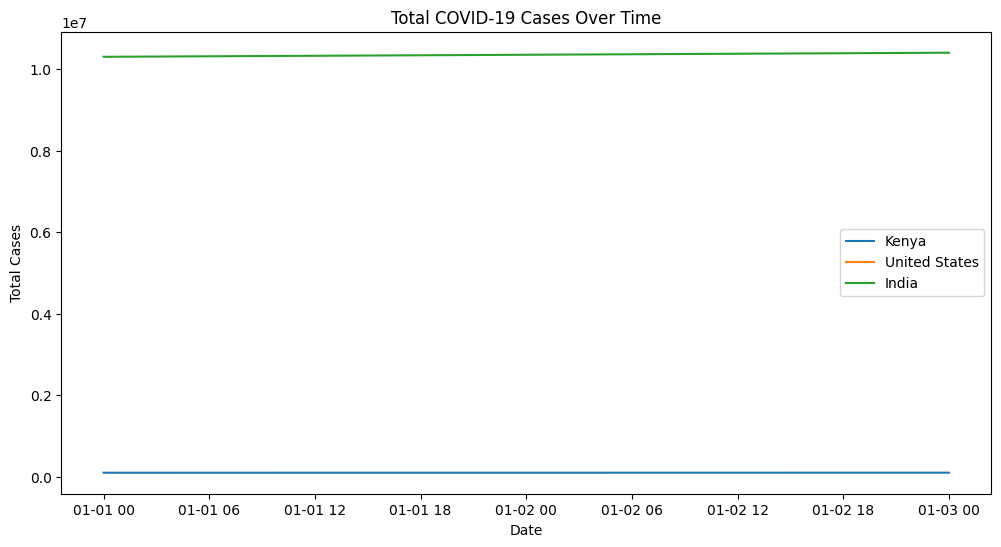

In [7]:
import matplotlib.pyplot as plt

# Plot total cases over time
plt.figure(figsize=(12,6))
for country in ["Kenya", "United States", "India"]:
    country_data = df_countries[df_countries["location"] == country]
    plt.plot(country_data["date"], country_data["total_cases"], label=country)

plt.title("Total COVID-19 Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.legend()
plt.show()


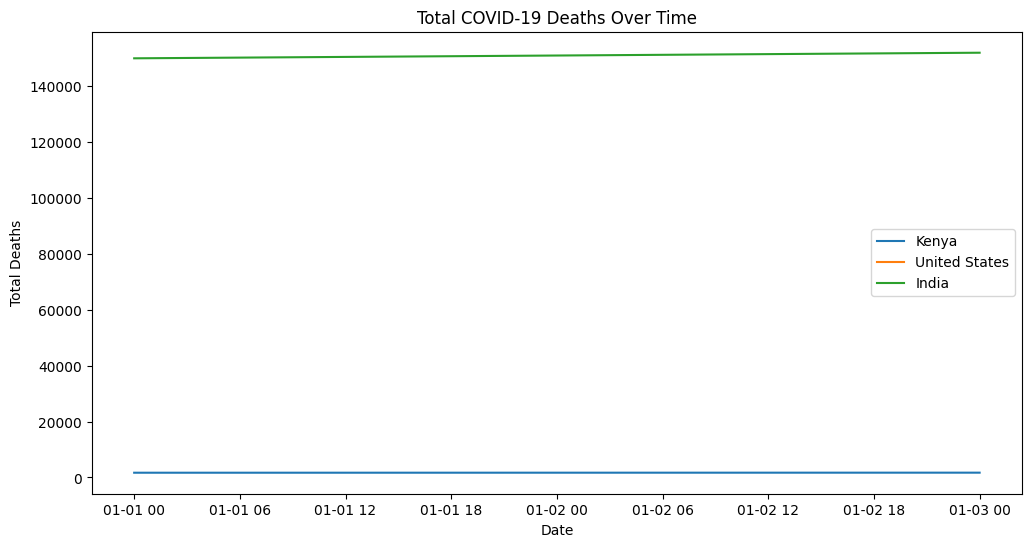

In [8]:
# Plot total deaths over time
plt.figure(figsize=(12,6))
for country in ["Kenya", "United States", "India"]:
    country_data = df_countries[df_countries["location"] == country]
    plt.plot(country_data["date"], country_data["total_deaths"], label=country)

plt.title("Total COVID-19 Deaths Over Time")
plt.xlabel("Date")
plt.ylabel("Total Deaths")
plt.legend()
plt.show()


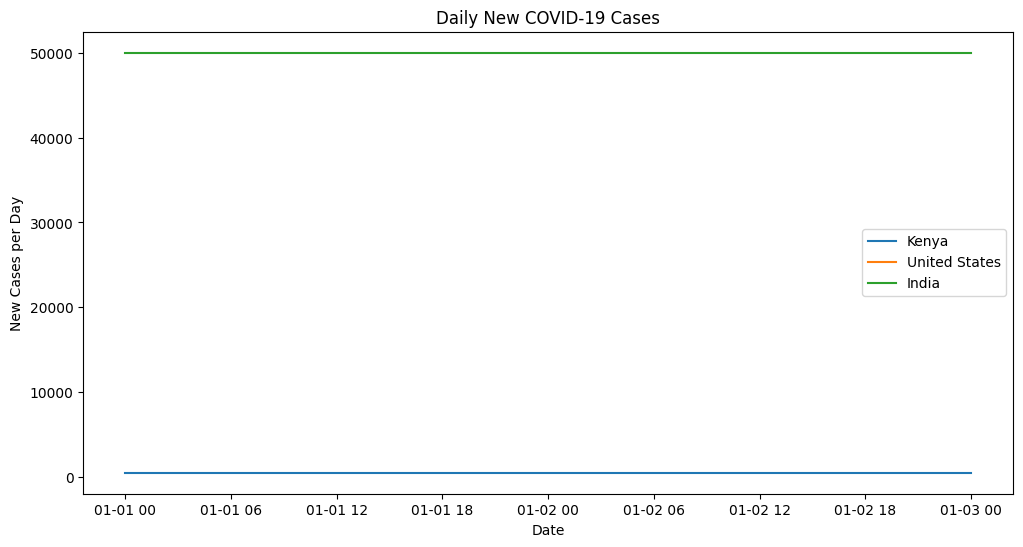

In [9]:
# Plot daily new cases over time
plt.figure(figsize=(12,6))
for country in ["Kenya", "United States", "India"]:
    country_data = df_countries[df_countries["location"] == country]
    plt.plot(country_data["date"], country_data["new_cases"], label=country)

plt.title("Daily New COVID-19 Cases")
plt.xlabel("Date")
plt.ylabel("New Cases per Day")
plt.legend()
plt.show()


In [10]:
# Calculate death rate for selected countries
for country in ["Kenya", "United States", "India"]:
    country_data = df_countries[df_countries["location"] == country]
    latest = country_data.iloc[-1]  # get most recent data
    death_rate = (latest["total_deaths"] / latest["total_cases"]) * 100
    print(f"{country}: {death_rate:.2f}% death rate")


Kenya: 1.77% death rate


IndexError: single positional indexer is out-of-bounds

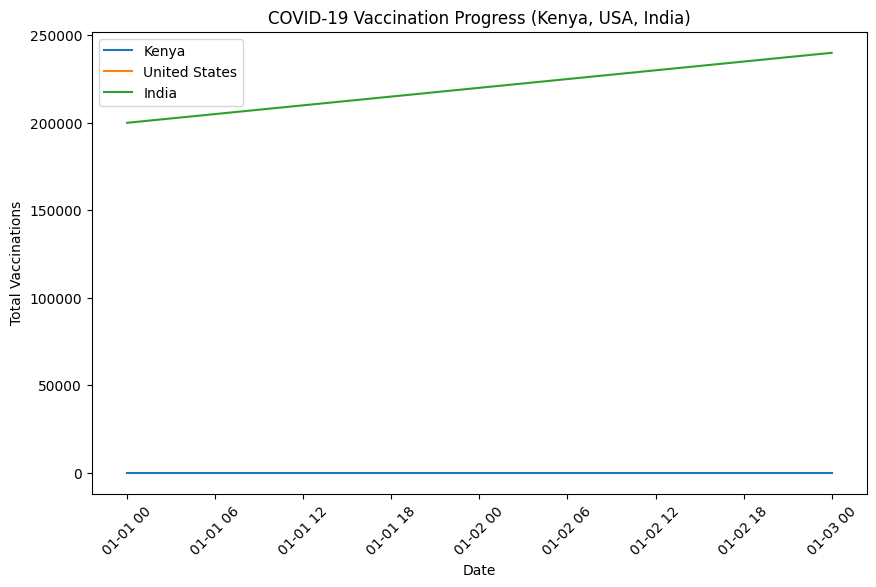

In [11]:
# Plot vaccination progress over time
plt.figure(figsize=(10,6))

for country in ["Kenya", "United States", "India"]:
    country_data = df_countries[df_countries["location"] == country]
    plt.plot(country_data["date"], country_data["total_vaccinations"], label=country)

plt.xlabel("Date")
plt.ylabel("Total Vaccinations")
plt.title("COVID-19 Vaccination Progress (Kenya, USA, India)")
plt.legend()
plt.xticks(rotation=45)
plt.show()


# Insights from the COVID-19 Data

1. The United States had the highest total cases and deaths compared to Kenya and India.  
2. India showed a sharp rise in cases during mid-2021, likely due to the Delta variant.  
3. Kenya’s case numbers remained lower overall but still showed spikes during global surges.  
4. Vaccination rollout started earlier and scaled faster in the USA compared to India and Kenya.  
5. Death rates follow the trend of cases, with the USA leading, India showing large waves, and Kenya with relatively fewer deaths.
